In [207]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import scipy.optimize as opt


# path = 'D:\\z\\1\\ex2data2.txt'

# data = pd.read_csv(path, header=None, 
#                    names=['Test 1', 'Test 2', 'Accepted'])

# print('data = ')
# print(data.head(10) )
# print('................................................')
# print('data.describe = ')
# print(data.describe())

# positive = data[data['Accepted'].isin([1])]
# negative = data[data['Accepted'].isin([0])]

# #
# #print('................................................')
# #print('positive data')
# #print(positive)
# #print('................................................')
# #print('negative data')
# #print(negative)
# #print('................................................')
# #



# fig, ax = plt.subplots(figsize=(5,5))
# ax.scatter(positive['Test 1'], positive['Test 2'],
#            s=50, c='g', marker='o', label='Accepted')
# ax.scatter(negative['Test 1'], negative['Test 2'],
#            s=50, c='r', marker='x', label='Rejected')
# ax.legend()
# ax.set_xlabel('Test 1 Score')
# ax.set_ylabel('Test 2 Score')


# print('................................................')



# degree = 5

# x1 = data['Test 1']
# x2 = data['Test 2']

# print('x1 \n' ,x1.head(10))
# print('................................................')
# print('x2 \n' ,x2.head(10))

# print('................................................')

# data.insert(3, 'Ones', 1)   # adding x0

# print('data \n' , data.head(10))
# print('................................................')



# '''
# x1 + x1^2 + x1x2 + x1^3 + x1^2 x2 + x1 x2^2 + x1^4 + x1^3 x2 + x1^2 x2^2 + x1 x2^3


# F10 = x1

# F20 = x1^2
# F21 = x1 x2

# F30 = x1^3
# F31 = x1^2 x2
# F32 = x1 x2^2

# F40 = x1^4
# F41 = x1^3 x2
# F42 = x1^2 x2^2
# F43 = x1 x2^3 

# '''
# for i in range(1, degree): # 1,2,3,4
#     for j in range(0, i):  # 0 , 1 , 2 ,2
#         data['F' + str(i) + str(j)] = np.power(x1, i-j) * np.power(x2, j) # i=3 , j=2

# data.drop('Test 1', axis=1, inplace=True)
# data.drop('Test 2', axis=1, inplace=True)

# print('data \n' , data.head(10))

# print('................................................')



# def sigmoid(z):
#     return 1 / (1 + np.exp(-z))


# def costReg(theta, X, y, lr ):
#     theta = np.matrix(theta)
#     X = np.matrix(X)
#     y = np.matrix(y)
#     first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
#     second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
#     reg = (lr / 2 * len(X)) * np.sum(np.power(theta[:,1:theta.shape[1]], 2))
    
     
#     return np.sum(first - second) / (len(X)) + reg




# def gradientReg(theta, X, y, learningRate):
#     theta = np.matrix(theta)
#     X = np.matrix(X)
#     y = np.matrix(y)
    
#     parameters = int(theta.ravel().shape[1])
#     grad = np.zeros(parameters)
    
#     error = sigmoid(X * theta.T) - y
    
#     for i in range(parameters):
#         term = np.multiply(error, X[:,i])
        
#         if (i == 0):
#             grad[i] = np.sum(term) / len(X)
#         else:
#             grad[i] =(np.sum(term)/len(X))+((learningRate/len(X))*theta[:,i])
    
#     return grad

# # set X and y (remember from above that we moved the label to column 0)
# cols = data.shape[1]
# print('cols = ' , cols)
# print('................................................')

# X2 = data.iloc[:,1:cols]
# print('X2 = ')
# print(X2.head(10))
# print('................................................')

# y2 = data.iloc[:,0:1]
# print('y2 = ')
# print(y2.head(10))
# print('................................................')

# # convert to numpy arrays and initalize the parameter array theta
# X2 = np.array(X2.values)
# y2 = np.array(y2.values)
# theta2 = np.zeros(X2.shape[1])

# print('theta 2 = ' , theta2)
# print('................................................')

# learningRate = 0.00001


# rcost = costReg(theta2, X2, y2, learningRate)
# print()
# print('regularized cost = ' , rcost)
# print()



# result = opt.fmin_tnc(func=costReg, x0=theta2, fprime=gradientReg,
#                       args=(X2, y2, learningRate))
# print( 'result = ' , result )
# print()

# def predict(theta, X):
#     probability = sigmoid(X * theta.T)
#     return [1 if x >= 0.5 else 0 for x in probability]

# theta_min = np.matrix(result[0])
# predictions = predict(theta_min, X2)
# correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y2)]
# accuracy = (sum(map(int, correct)) % len(correct))
# print ('accuracy = {0}%'.format(accuracy))


In [208]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt

In [209]:
path = '/Users/fox/Desktop/ML_Art/Classification_code/data2.txt'

data = pd.read_csv(path, header=None, 
                   names=['Test 1', 'Test 2', 'Accepted'])


In [210]:
data.head()

,Test 1,Test 2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [211]:
data.describe()

,Test 1,Test 2,Accepted
count,118.000000,118.000000,118.000000
mean,0.054779,0.183102,0.491525
std,0.496654,0.519743,0.502060
min,-0.830070,-0.769740,0.000000
25%,-0.372120,-0.254385,0.000000
50%,-0.006336,0.213455,0.000000
75%,0.478970,0.646562,1.000000
max,1.070900,1.108900,1.000000


In [212]:
positive = data[data['Accepted'] == 1]
negative = data[data['Accepted'] == 0]

In [213]:
positive.head()

,Test 1,Test 2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [214]:
negative.head()

,Test 1,Test 2,Accepted
58,0.18376,0.93348,0
59,0.22408,0.77997,0
60,0.29896,0.61915,0
61,0.50634,0.75804,0
62,0.61578,0.72880,0


In [215]:
print(len(positive),len(negative))

58 60


Text(0, 0.5, 'Test 1 score')

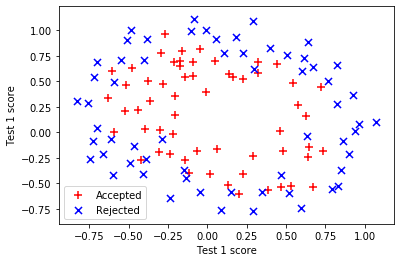

In [216]:
fig, ax = plt.subplots()

ax.scatter(positive['Test 1'] , positive['Test 2'] , s = 50 , c = 'r' , marker = '+', label = 'Accepted')

ax.scatter(negative['Test 1'] , negative['Test 2'] , s = 50 , c = 'b' , marker = 'x', label = 'Rejected')

ax.legend()
ax.set_xlabel('Test 1 score')
ax.set_ylabel('Test 1 score')

In [217]:
X1 = data['Test 1']
X2 = data['Test 2']
degree = 5

In [218]:
data.insert(3, 'Ones', 1) # adding x0

In [219]:
'''
for making more thetas 
# x1 + x1^2 + x1x2 + x1^3 + x1^2 x2 + x1 x2^2 + x1^4 + x1^3 x2 + x1^2 x2^2 + x1 x2^3


# F10 = x1

# F20 = x1^2
# F21 = x1 x2

# F30 = x1^3
# F31 = x1^2 x2
# F32 = x1 x2^2

# F40 = x1^4
# F41 = x1^3 x2
# F42 = x1^2 x2^2
# F43 = x1 x2^3 

 '''
for i in range(1, degree): # 1,2,3,4
    for j in range(0, i):  # 0 , 1 , 2 ,2
        data['F' + str(i) + str(j)] = np.power(X1, i-j) * np.power(X2, j) # i=3 , j=2
        

In [220]:
data.head()

,Test 1,Test 2,Accepted,Ones,F10,F20,F21,F30,F31,F32,F40,F41,F42,F43
0,0.051267,0.69956,1,1,0.051267,0.002628,0.035864,0.000135,0.001839,0.025089,0.000007,0.000094,0.001286,0.017551
1,-0.092742,0.68494,1,1,-0.092742,0.008601,-0.063523,-0.000798,0.005891,-0.043509,0.000074,-0.000546,0.004035,-0.029801
2,-0.213710,0.69225,1,1,-0.213710,0.045672,-0.147941,-0.009761,0.031616,-0.102412,0.002086,-0.006757,0.021886,-0.070895
3,-0.375000,0.50219,1,1,-0.375000,0.140625,-0.188321,-0.052734,0.070620,-0.094573,0.019775,-0.026483,0.035465,-0.047494
4,-0.513250,0.46564,1,1,-0.513250,0.263426,-0.238990,-0.135203,0.122661,-0.111283,0.069393,-0.062956,0.057116,-0.051818


In [221]:
data.drop('Test 1', axis= 1, inplace= True)
data.drop('Test 2', axis= 1, inplace= True)
data.head()

,Accepted,Ones,F10,F20,F21,F30,F31,F32,F40,F41,F42,F43
0,1,1,0.051267,0.002628,0.035864,0.000135,0.001839,0.025089,0.000007,0.000094,0.001286,0.017551
1,1,1,-0.092742,0.008601,-0.063523,-0.000798,0.005891,-0.043509,0.000074,-0.000546,0.004035,-0.029801
2,1,1,-0.213710,0.045672,-0.147941,-0.009761,0.031616,-0.102412,0.002086,-0.006757,0.021886,-0.070895
3,1,1,-0.375000,0.140625,-0.188321,-0.052734,0.070620,-0.094573,0.019775,-0.026483,0.035465,-0.047494
4,1,1,-0.513250,0.263426,-0.238990,-0.135203,0.122661,-0.111283,0.069393,-0.062956,0.057116,-0.051818


# Regularization
* the most important thing for regularization is cancelling the overfit and probably decrease the cost

In [222]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [223]:
def costReg(theta, X, y, lr):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    first_term  = np.multiply(y, np.log(sigmoid(X * theta.T)))
    second_term = np.multiply((1 - y) , np.log(1 - sigmoid(X * theta.T)) )
    summation_term = np.sum(first_term+second_term) / len(X)

    reg = (lr / 2 * len(X)) * np.sum(np.power(theta[: , 1:theta.shape[1]] ,2))
    # theta[: , 1:theta.shape[1]] ==> start form 2nd theta for end of it
    return -1 * summation_term + reg 
    

In [224]:
def gradientReg(theta, X, y, learningRate):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    
    error = sigmoid(X * theta.T) - y
    
    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        grad[i] = np.sum(term) / len(X)
    
    return grad


In [225]:
 data.shape

(118, 12)

In [226]:
cols = data.shape[1]
cols

12

In [227]:
X2 = data.iloc[: , 1:cols]
X2.head()

,Ones,F10,F20,F21,F30,F31,F32,F40,F41,F42,F43
0,1,0.051267,0.002628,0.035864,0.000135,0.001839,0.025089,0.000007,0.000094,0.001286,0.017551
1,1,-0.092742,0.008601,-0.063523,-0.000798,0.005891,-0.043509,0.000074,-0.000546,0.004035,-0.029801
2,1,-0.213710,0.045672,-0.147941,-0.009761,0.031616,-0.102412,0.002086,-0.006757,0.021886,-0.070895
3,1,-0.375000,0.140625,-0.188321,-0.052734,0.070620,-0.094573,0.019775,-0.026483,0.035465,-0.047494
4,1,-0.513250,0.263426,-0.238990,-0.135203,0.122661,-0.111283,0.069393,-0.062956,0.057116,-0.051818


In [228]:
y2 = data.iloc[: , :1]
y2.head()

,Accepted
0,1
1,1
2,1
3,1
4,1


## convert to numpy arrays and initalize the parameter array theta

In [229]:
X2 = np.array(X2.values)
y2 = np.array(y2.values)
theta2 = np.zeros(X2.shape[1])

print('theta 2 = ' , theta2)


theta 2 =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [230]:
learningRate = 1
regularized_cost = costReg(theta2, X2, y2, learningRate)
print('Regularization is = ', regularized_cost)


Regularization is =  0.6931471805599454


In [231]:
import scipy.optimize as opt
result = opt.fmin_tnc(func=costReg, x0=theta2, fprime=gradientReg, args=(X2, y2 , learningRate))
result

(array([ 9.35368946e-05,  7.39699769e-05, -2.85678077e-04, -1.79282287e-04,
         9.52996225e-05, -3.20347958e-05, -1.50759291e-04, -2.12467734e-04,
         9.56913669e-06, -2.46539239e-04, -1.81211498e-05]), 99, 1)

In [232]:
print('the best valuse for thetas is =\n{}'.format(result[0]))
    

the best valuse for thetas is =
[ 9.35368946e-05  7.39699769e-05 -2.85678077e-04 -1.79282287e-04
  9.52996225e-05 -3.20347958e-05 -1.50759291e-04 -2.12467734e-04
  9.56913669e-06 -2.46539239e-04 -1.81211498e-05]


In [233]:
def predict(theta, X):
    probability = sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]

In [234]:
best_thetas = np.matrix(result[0])
predictions = predict(best_thetas, X2)
predictions[:20]

[1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1]

## calculate the accuracy

In [235]:
correct = [1 if a + b == 2 or a + b == 0 else 0 for (a, b) in zip(predictions, y2)]
accuracy = sum(correct) % len(correct)
print('Accuracy is = {}%'.format(accuracy))

Accuracy is = 80%


## if we change the learning rate , accuracy will chanege